<a href="https://colab.research.google.com/github/Saikumarmuddada/OBESITY-LEVEL-PREDICTION-USING-MACHINE-LEARNING/blob/main/Obesity_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Machine Learning to Classify Obesity Levels Based on Lifestyle and Physical Condition**

# **Import Library and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **Data Exploration and Visualization**
Before jumping into modeling, we need to check for missing values and understand the distribution of our target variable (NObeyesdad).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

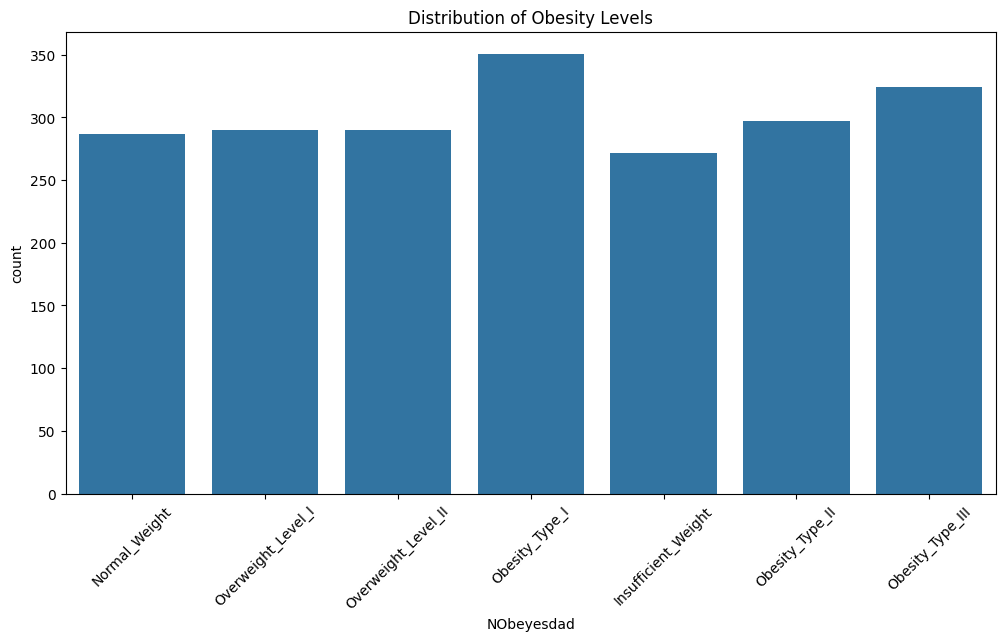

In [ ]:
# Check for missing values and data types
print(df.info())

# Visualize the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')
plt.show()

# **Feature Engineering and Preprocessing**
The dataset contains several categorical columns (like Gender, Family History, etc.). We will use Label Encoding for the categorical variables and split the data into training and testing sets.

In [ ]:
# Encoding categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Splitting features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (1688, 16)
Testing shape: (423, 16)


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale (excluding the target if it was encoded)
# In this dataset, most features are now numeric after LabelEncoding
numerical_features = X_train.columns

# Fit on training data and transform both sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Verify the scaling
print("Mean of scaled training data (should be ~0):", np.mean(X_train_scaled.iloc[:, 0]))
print("Std deviation of scaled training data (should be ~1):", np.std(X_train_scaled.iloc[:, 0]))

# Preview the scaled features
X_train_scaled.head()

Mean of scaled training data (should be ~0): -2.1046881983415288e-17
Std deviation of scaled training data (should be ~1): 0.9999999999999905


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
162,-1.013119,-0.532646,-0.768029,-1.019413,0.469612,0.355083,1.076717,0.401513,-3.886490,6.502465,-0.010142,-0.214123,1.186213,-1.069472,-0.525657,0.506761
2001,-1.013119,-0.544235,0.546078,1.802127,0.469612,0.355083,1.076717,0.401513,0.302779,-0.153788,1.446428,-0.214123,0.567871,0.224537,-0.525657,0.506761
1435,-1.013119,-0.239258,-0.427896,-0.153398,0.469612,0.355083,-2.268694,-1.700740,0.302779,-0.153788,1.246128,-0.214123,-1.043353,1.684843,-0.525657,0.506761
649,-1.013119,-0.403229,-1.217973,-1.623588,-2.129419,-2.816242,1.076717,-1.265210,-1.791856,-0.153788,0.892863,-0.214123,0.112755,-1.069472,1.411698,0.506761
1280,0.987051,0.238722,1.179597,0.745216,0.469612,0.355083,1.076717,0.401513,0.302779,-0.153788,1.398040,-0.214123,0.963833,0.059515,-0.525657,0.506761
